#Ricos pelo Acaso

# 1. Importando Bibliotecas


In [3]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 5.5MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=34847841f7027b13e31dbe98db244b14e2232ddcdacef922c6c327aaa8aa609e
  Stored in directory: /tmp/pip-ephem-wheel-cache-fhumiyza/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

# 2. Obtendo e tratando os dados

In [13]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed

1 Failed download:
- PCAR4.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [14]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [15]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30,18.670000,58.279999,41.584641,50.773510,33.686272,35.757030,33.456081,74.486694,36.712975,29.322687,35.200001,29.850000,18.059999,62.860001,18.272482,8.338457,12.861021,11.43,23.049788,68.119377,14.080591,43.799999,27.441227,16.299999,47.717464,33.875996,34.257431,19.730000,21.450739,22.202646,29.811613,19.719763,68.015381,9.118237,36.799999,12.469612,33.553017,34.716450,52.387344,37.284752,13.562504,36.167961,25.216917,18.470348,25.895611,55.163265,11.578378,9.96,21.139120,32.949112,38.669998,30.812927,30.177769,36.896526,22.201923,26.100000,47.053921,46.557728,58.579178,28.865875,57.796204,39.680000,28.829844,64.008476,25.160667,9.422270,51.161327,11.170000,34.383316,46.621166
2020-01-02,19.200001,58.799999,44.018120,51.715546,35.040844,37.081734,33.811050,74.693604,36.473209,29.976038,35.880001,30.400000,18.219999,65.180000,18.291737,8.559227,12.945012,12.20,23.622330,70.214752,14.659383,44.709999,28.753675,16.299999,48.844650,34.216549,34.678478,20.200001,21.648558,22.943060,30.290081,20.469116,71.413658,9.511264,37.169998,12.965276,34.065578,35.017998,53.971836,38.184563,13.812769,37.089584,26.585278,18.470348,26.785116,56.449326,12.010077,10.06,21.776728,33.549999,38.330002,31.583250,30.697731,38.985012,22.836323,26.400000,49.247314,48.200947,58.569500,29.598816,59.118023,40.790001,28.625641,68.569893,25.279165,9.610517,52.150002,11.730000,34.958687,45.885044
2020-01-03,18.930000,56.759998,42.749588,51.629032,34.492519,37.098793,33.438335,74.910362,36.991104,29.800508,35.939999,31.750000,18.629999,64.300003,18.089565,8.449366,12.805092,12.15,24.234358,71.575768,14.549613,44.200001,30.315672,16.170000,49.126442,33.696758,34.535145,20.410000,21.786886,22.670277,29.508492,20.133879,72.749046,9.530915,35.900002,13.513627,34.479568,35.737812,54.051064,37.887821,13.610631,36.699478,26.849174,18.919870,26.835089,56.056633,11.902953,10.28,21.776728,33.549999,41.000000,30.803299,30.447748,39.790565,22.327213,25.629999,48.532730,48.172615,57.563519,29.413778,61.311485,40.650002,28.588511,70.027557,24.982924,9.511439,51.766048,11.480000,34.512283,44.923176
2020-01-06,19.020000,55.000000,42.339748,50.946541,34.294689,36.436146,33.988541,74.801979,37.163734,28.308535,35.570000,33.400002,18.500000,63.900002,17.627457,8.239630,12.982298,11.99,23.178116,71.154732,14.190363,43.820000,30.038395,16.080000,48.713146,33.858070,34.588894,20.379999,21.618916,22.699501,30.380713,20.084583,69.749390,9.481787,34.250000,13.219164,33.513588,34.920723,53.961933,37.533634,13.581754,36.153332,26.213865,19.089691,26.525263,56.007549,11.912691,10.09,21.482447,33.490002,40.130001,31.804716,30.807720,41.421577,21.887709,24.900000,47.967007,46.785656,56.683281,28.451574,61.560516,40.580002,28.764870,68.431068,24.439817,9.333100,51.458889,11.480000,34.601562,45.786896
2020-01-07,19.059999,56.820000,43.705864,50.562042,33.711079,35.803158,34.006287,75.100418,37.326775,28.269527,35.160000,32.529999,18.799999,63.740002,18.022173,7.999932,13.457892,12.08,23.039917,72.437424,14.190363,44.400002,30.130819,16.440001,48.816471,34.727379,35.117447,20.500000,21.490467,22.582596,30.694319,20.400097,67.367607,9.550567,34.450001,12.855913,32.173046,34.580273,54.120384,37.782520,13.398867,35.314602,26.683016,19.149626,25.995556,55.978096,11.878607,10.40,21.580540

In [16]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.028388,0.008922,0.058519,0.018554,0.040211,0.037047,0.010610,0.002778,-0.006531,0.022281,0.019318,0.018425,0.008859,0.036907,0.001054,0.026476,0.006531,0.067367,0.024839,0.030760,0.041106,0.020776,0.047828,0.000000,0.023622,0.010053,0.012291,0.023822,0.009222,0.033348,0.016050,0.038000,0.049963,0.043103,0.010054,0.039750,0.015276,0.008686,0.030246,0.024133,0.018453,0.025482,0.054264,0.000000,0.034350,0.023314,0.037285,0.010040,0.030162,0.018237,-0.008792,0.025000,0.017230,0.056604,0.028574,0.011494,0.046614,0.035294,-0.000165,0.025391,0.022870,0.027974,-0.007083,0.071263,0.004710,0.019979,0.019325,0.050134,0.016734,-0.015789
2020-01-03,-0.014063,-0.034694,-0.028818,-0.001673,-0.015648,0.000460,-0.011023,0.002902,0.014199,-0.005856,0.001672,0.044408,0.022503,-0.013501,-0.011053,-0.012835,-0.010809,-0.004098,0.025909,0.019384,-0.007488,-0.011407,0.054323,-0.007975,0.005769,-0.015191,-0.004133,0.010396,0.006390,-0.011890,-0.025803,-0.016378,0.018699,0.002066,-0.034167,0.042294,0.012153,0.020556,0.001468,-0.007771,-0.014634,-0.010518,0.009926,0.024337,0.001866,-0.006957,-0.008920,0.021869,0.000000,0.000000,0.069658,-0.024695,-0.008143,0.020663,-0.022294,-0.029167,-0.014510,-0.000588,-0.017176,-0.006252,0.037103,-0.003432,-0.001297,0.021258,-0.011719,-0.010309,-0.007362,-0.021313,-0.012769,-0.020963
2020-01-06,0.004754,-0.031008,-0.009587,-0.013219,-0.005735,-0.017862,0.016454,-0.001447,0.004667,-0.050065,-0.010295,0.051969,-0.006978,-0.006221,-0.025546,-0.024823,0.013839,-0.013169,-0.043584,-0.005882,-0.024691,-0.008597,-0.009146,-0.005566,-0.008413,0.004787,0.001556,-0.001470,-0.007710,0.001289,0.029558,-0.002448,-0.041233,-0.005155,-0.045961,-0.021790,-0.028016,-0.022863,-0.001649,-0.009348,-0.002122,-0.014882,-0.023662,0.008976,-0.011546,-0.000876,0.000818,-0.018482,-0.013514,-0.001788,-0.021219,0.032510,0.011823,0.040990,-0.019685,-0.028482,-0.011657,-0.028791,-0.015292,-0.032713,0.004062,-0.001722,0.006169,-0.022798,-0.021739,-0.018750,-0.005934,0.000000,0.002587,0.019227
2020-01-07,0.002103,0.033091,0.032266,-0.007547,-0.017018,-0.017373,0.000522,0.003990,0.004387,-0.001378,-0.011527,-0.026048,0.016216,-0.002504,0.022392,-0.029091,0.036634,0.007506,-0.005962,0.018027,0.000000,0.013236,0.003077,0.022388,0.002121,0.025675,0.015281,0.005888,-0.005941,-0.005150,0.010323,0.015709,-0.034148,0.007254,0.005839,-0.027479,-0.040000,-0.009749,0.002936,0.006631,-0.013466,-0.023199,0.017897,0.003140,-0.019970,-0.000526,-0.002861,0.030723,0.004566,0.002687,0.016197,-0.013624,-0.003895,-0.025450,-0.013720,0.014859,0.009725,-0.002105,-0.017065,0.016910,-0.019605,0.012814,-0.011939,0.004202,0.022222,0.009554,0.007275,0.014808,0.007741,-0.018650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,-0.004359,-0

In [17]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-02,1.028388,1.008922,1.058519,1.018554,1.040211,1.037047,1.010610,1.002778,0.993469,1.022281,1.019318,1.018425,1.008859,1.036907,1.001054,1.026476,1.006531,1.067367,1.024839,1.030760,1.041106,1.020776,1.047828,1.000000,1.023622,1.010053,1.012291,1.023822,1.009222,1.033348,1.016050,1.038000,1.049963,1.043103,1.010054,1.039750,1.015276,1.008686,1.030246,1.024133,1.018453,1.025482,1.054264,1.000000,1.034350,1.023314,1.037285,1.010040,1.030162,1.018237,0.991208,1.025000,1.017230,1.056604,1.028574,1.011494,1.046614,1.035294,0.999835,1.025391,1.022870,1.027974,0.992917,1.071263,1.004710,1.019979,1.019325,1.050134,1.016734,0.984211
2020-01-03,1.013926,0.973919,1.028014,1.016850,1.023934,1.037524,0.999470,1.005688,1.007576,1.016295,1.021023,1.063652,1.031561,1.022908,0.989990,1.013301,0.995651,1.062992,1.051392,1.050740,1.033310,1.009132,1.104749,0.992025,1.029528,0.994709,1.008107,1.034465,1.015671,1.021062,0.989832,1.021000,1.069597,1.045259,0.975544,1.083725,1.027615,1.029420,1.031758,1.016175,1.003549,1.014696,1.064729,1.024337,1.036279,1.016195,1.028033,1.032128,1.030162,1.018237,1.060253,0.999688,1.008946,1.078437,1.005643,0.981992,1.031428,1.034686,0.982662,1.018981,1.060822,1.024446,0.991629,1.094036,0.992936,1.009464,1.011820,1.027753,1.003751,0.963579
2020-01-06,1.018747,0.943720,1.018158,1.003408,1.018061,1.018992,1.015915,1.004233,1.012278,0.965414,1.010511,1.118928,1.024363,1.016545,0.964700,0.988148,1.009430,1.048994,1.005567,1.044559,1.007796,1.000457,1.094645,0.986503,1.020866,0.999471,1.009676,1.032945,1.007840,1.022378,1.019090,1.018500,1.025494,1.039871,0.930707,1.060110,0.998825,1.005884,1.030057,1.006675,1.001419,0.999596,1.039535,1.033532,1.024315,1.015305,1.028874,1.013052,1.016241,1.016416,1.037755,1.032187,1.020875,1.122642,0.985847,0.954023,1.019405,1.004896,0.967635,0.985647,1.065131,1.022681,0.997746,1.069094,0.971350,0.990536,1.005816,1.027753,1.006347,0.982105
2020-01-07,1.020889,0.974949,1.051010,0.995835,1.000736,1.001290,1.016446,1.008239,1.016719,0.964084,0.998864,1.089782,1.040975,1.013999,0.986301,0.959402,1.046409,1.056868,0.999572,1.063389,1.007796,1.013699,1.098013,1.008589,1.023032,1.025132,1.025105,1.039027,1.001852,1.017113,1.029609,1.034500,0.990476,1.047414,0.936141,1.030979,0.958872,0.996077,1.033081,1.013350,0.987935,0.976406,1.058139,1.036777,1.003860,1.014771,1.025930,1.044177,1.020882,1.019147,1.054564,1.018125,1.016899,1.094070,0.972322,0.968199,1.029319,1.002780,0.951123,1.002314,1.044249,1.035786,0.985834,1.073586,0.992936,1.000000,1.013133,1.042972,1.014137,0.963789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 3. Resultados

In [18]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 100 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,SULA11.SA,SUZB3.SA,B3SA3.SA,EMBR3.SA,CVCB3.SA,saldo,retorno
Date,,,,,,,
2019-12-30,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000,NaN
2020-01-02,102.287035,102.797381,105.851870,102.382165,102.077625,515.396077,0.030792
2020-01-03,106.082202,102.444560,102.801389,103.446530,100.913246,515.687925,0.000566
2020-01-06,106.513080,102.268149,101.815834,103.294474,100.045663,513.937199,-0.003395
2020-01-07,104.424930,103.578624,105.100978,103.902689,101.369868,518.377090,0.008639
...,...,...,...,...,...,...,...
2020-12-18,76.527517,143.447575,144.981417,45.767866,47.488584,458.212958,0.005465
2020-12-21,75.627803,139.163308,141.879308,43.284339,45.159820,445.114578,-0.028586
2020-12-22,74.209025,145.362903,144.957364,41.662445,42.305938,448.497676,0.007601


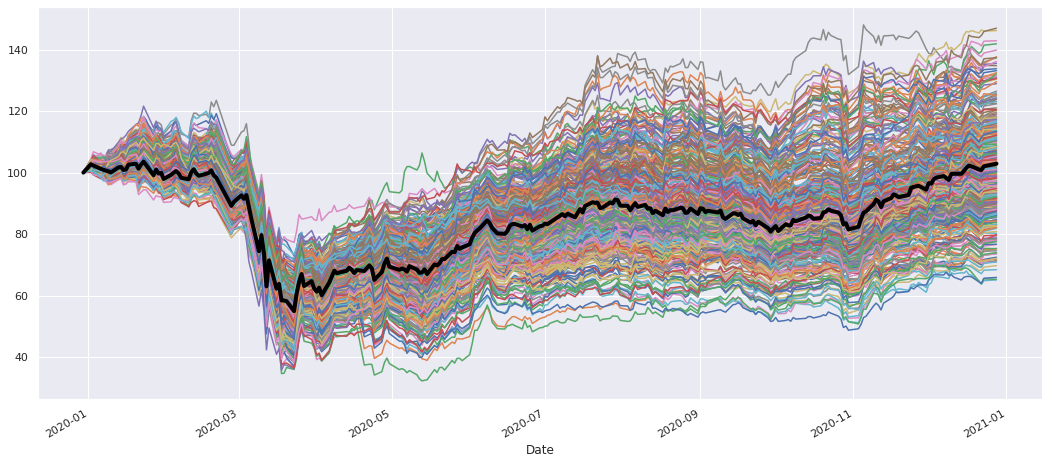

In [21]:
for i in range(352):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 20 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*100).plot(linewidth=4, color='black')
  